Umair Hussain
hussa906

Part 1

In [2]:
import pandas as pd
import pymc as pm
import numpy as np
import arviz as az
from scipy import stats
import matplotlib.pyplot as plt
n,p=1000,4
# Load the dataset
df = pd.read_csv("data.csv", index_col=0)

# Randomly choose 1000 entries from the dataset
df_sampled = df.sample(n=1000, random_state=90210)  # Set random_state for reproducibility

# Select predictor and response variables
X = df_sampled[['weight_kgs', 'overall_rating', 'age', 'composure']]
Y = df_sampled[['potential']]

X

,weight_kgs,overall_rating,age,composure
name,,,,
N. Almas,74.8,55,19,37
T. Kanai,69.9,63,29,47
A. Izzo,78.0,77,27,76
A. Angulo,68.0,66,21,60
Patric,82.1,74,31,60
...,...,...,...,...
D. Milinković,69.9,67,24,64
T. Szántó,73.0,66,23,60
F. Feuillassier,68.9,65,20,54


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

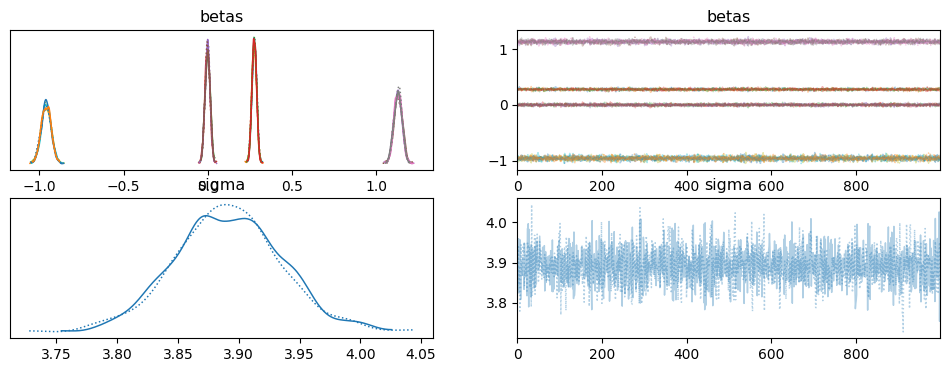

In [2]:
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=10, lower=0)
    Y = pm.Normal('Y', mu=pm.math.dot(X, betas), sigma=sigma, observed=Y)

with MLR:
    idata = pm.sample()

# Evaluate the results
pm.summary(idata)
pm.plot_trace(idata)

Part 2

1.

\begin{align*}
p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}) = {}& \mathcal{MVN}\left(\overset{E[\boldsymbol \beta | \boldsymbol\Sigma, \mathbf{X},\mathbf{y}] \; = \quad\quad}{\text{Cov}[\boldsymbol \beta | \boldsymbol\Sigma, \mathbf{X},\mathbf{y}]}\bigg( \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right), \text{Cov}[\boldsymbol \beta | \boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg)\\
\end{align*}

Then we substitute $\Sigma=\sigma^2I$ and get
\begin{align*}
p(\boldsymbol \beta |\boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}) = {}& \mathcal{MVN}\left(\overset{E[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] \; = \quad\quad}{\text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}]}\bigg( \mathbf{X}^\top \boldsymbol(\sigma^2I)^{-1}\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right), \text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \left[\mathbf{X}^{\top}\boldsymbol (\sigma^2I)^{-1} \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg)\\
\end{align*}

\begin{align*}
p(\boldsymbol \beta |\boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}) = {}& \mathcal{MVN}\left(\overset{E[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] \; = \quad\quad}{\text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}]}\bigg( \mathbf{X}^\top \boldsymbol(\frac{1}{\sigma^2})\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right), \text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \left[\mathbf{X}^{\top}\boldsymbol (\frac{1}{\sigma^2}) \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg)\\
= {}& \mathcal{MVN}\left(\overset{E[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] \; = \quad\quad}{\text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}]}\bigg(\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^\top \mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right), \text{Cov}[\boldsymbol \beta | \boldsymbol\sigma^2I, \mathbf{X},\mathbf{y}] = \left[\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg)\\
= {}& \mathcal{MVN}\left(\left[\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg(\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^\top \mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right), \left[\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg)\\
\end{align*}

2.

\begin{align*}
E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] &= \left[\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg(\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^\top \mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0\bigg) \\
&= \left(\frac{1}{\sigma^2} \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right)^{-1} \left(\frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0\right) \\
&= \left(\frac{1}{\sigma^2} \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right)^{-1} \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{y} + \left(\frac{1}{\sigma^2} \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right)^{-1}\boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \\
&= \left(\frac{1}{\sigma^2} \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right)^{-1} \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{y} + \left(\frac{1}{\sigma^2} \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right)^{-1}\boldsymbol \beta_0 \\
&= \left(\frac{1}{\sigma^2} \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right)^{-1} \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{y} + \left(\frac{1}{\sigma^2} \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right)^{-1}\boldsymbol \beta_0 \\
&= \left[\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \bigg(\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^\top \mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0\bigg)
\end{align*}

3.

\begin{align*}
&\text{To find the hyperparameter values making } E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = (\mathbf{X^\top X})^{-1}\mathbf{X^\top y}, \\
&\text{we analyze each part of the expression:} \\
&\text{Given: } \left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \left( \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} + \boldsymbol \Sigma_\beta^{-1}\boldsymbol\beta_0 \right) = (\mathbf{X^\top X})^{-1}\mathbf{X^\top y} \\
&\text{Observing: } (\mathbf{X^\top X})^{-1}\mathbf{X^\top y} = \mathbf{X}^{-1}\mathbf{y} \\
&\text{Now, for } \left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y}: \\
&\text{If } \boldsymbol \Sigma_\beta^{-1} \text{ is zero:} \\
&\left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} \\
&= \left[\mathbf{X}^{\top}\boldsymbol \Sigma^{-1} \mathbf{X} \right]^{-1} \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} \\
&= \mathbf{X} ^{-1}\boldsymbol (\Sigma^{-1})^{-1} (\mathbf{X}^{\top})^{-1} \mathbf{X}^\top \boldsymbol\Sigma^{-1}\mathbf{y} \\
&= \mathbf{X} ^{-1}(\boldsymbol\Sigma^{-1})^{-1} \boldsymbol\Sigma^{-1}\mathbf{y} \\
&= \mathbf{X} ^{-1}\boldsymbol\Sigma \boldsymbol\Sigma^{-1}\mathbf{y} \\
&= \mathbf{X} ^{-1}\mathbf{y} \\
&\text{Thus, we need } \boldsymbol \Sigma_\beta^{-1} \text{ to be zero, while } \boldsymbol\beta_0 \text{ has no additional restrictions.}
\end{align*}

4.

\begin{align*}
&\text{To find the hyperparameter values making } E[  \mathbf{\hat y} = \mathbf{X}\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}(\mathbf{X^\top X})^{-1}\mathbf{X^\top y}, \\
&\text{we analyze the provided explanation:} \\
&\text{Given: } E[  \mathbf{\hat y} = \mathbf{X}\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}(\mathbf{X^\top X})^{-1}\mathbf{X^\top y} \\
&\text{Observing: } E[  \mathbf{\hat y} = \mathbf{X}\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] \\
&\text{since } \mathbf{X} \text{ is observed data, it can be evaluated as a fixed vector.} \\
&\text{Hence, we seek } \mathbf{X}E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}(\mathbf{X^\top X})^{-1}\mathbf{X^\top y}. \\
&\text{By canceling } \mathbf{X} \text{ on both sides, it reduces back to the question in snippet 3:} \\
& E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = (\mathbf{X^\top X})^{-1}\mathbf{X^\top y}. \\
&\text{So, the hyperparameter } \boldsymbol \Sigma_\beta^{-1} \text{ to be a zero matrix.}
\end{align*}

5.

\begin{align*}
&\text{To find the variance of } \boldsymbol \beta \text{ given } \boldsymbol\Sigma, \mathbf{X}, \text{ and } \mathbf{y}, \\
&\text{we are given: } \text{Var}[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \left[\boldsymbol(\frac{1}{\sigma^2}) \mathbf{X}^{\top}\mathbf{X}  + \boldsymbol \Sigma_\beta^{-1} \right]^{-1} \\
&\text{This expression represents the inverse of the covariance matrix of } \boldsymbol \beta \text{ given } \boldsymbol\Sigma, \mathbf{X}, \text{ and } \mathbf{y}.
\end{align*}

Part 3

In [3]:
import pandas as pd
import numpy as np

import pymc as pm

n=1; p=4; y=df_sampled[["potential"]].to_numpy()

with pm.Model() as MNV:
    # Prior on mu
    mu = pm.Normal('mu', mu=0, sigma=15, shape=p)

    # Cholesky factor
    chol_packed = pm.LKJCholeskyCov("chol_packed", n=p, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), compute_corr=False)
    chol = pm.expand_packed_triangular(p, chol_packed)

    y = pm.MvNormal('y', mu=mu, chol = chol, observed = y) # Using Cholesky factor parameterization directly in MVN

with MNV:
    idata = pm.sample()

In [4]:
pm.summary(idata)
pm.plot_trace(idata)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],2.133,1.566,0.567,3.699,1.103,0.933,3.0,12.0,2.30
mu[1],2.905,3.381,-0.476,6.286,2.381,2.015,2.0,11.0,2.97
mu[2],2.901,3.343,-0.441,6.243,2.354,1.992,2.0,22.0,2.64
mu[3],2.859,2.817,0.043,5.675,1.984,1.678,3.0,13.0,2.00
chol_packed[0],51.433,13.805,37.639,65.942,9.720,8.222,3.0,12.0,2.45
chol_packed[1],36.659,29.534,7.136,66.905,20.799,17.595,3.0,11.0,2.21
chol_packed[2],15.969,15.592,0.381,31.558,10.981,9.289,3.0,13.0,1.87
chol_packed[3],35.834,30.327,5.518,66.873,21.358,18.067,3.0,14.0,2.17
chol_packed[4],1.866,1.538,0.303,3.403,1.083,0.916,2.0,11.0,2.88
chol_packed[5],14.348,14.341,0.008,28.685,10.100,8.544,2.0,13.0,2.80
